# SI 618 Homework 5 - Natural Language Processing

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. Questions 1 through 6 are worth 10 points each; Question 7 is worth 20 points.

Version 2022.02.22.2.CT

## Background

(From https://www.kaggle.com/headsortails/us-election-2020-presidential-debates.)

The US 2020 election saw the incumbent Republican president Donald Trump facing off against his Democrat challenger Joe Biden. Both candidates agreed to debate their political stances in the lead-up to the vote on November 3rd.

The 1st debate took place on September 29th at Case Western Reserve University in Cleveland, Ohio. It was moderated by Fox News anchor Chris Wallace. 

After Donald Trump tested positive for Covid-19 after his first debate and subsequently recovered, the 2nd presidential debate was initially converted into a virtual event. However, Trump declined to participate in a virtual debate and the event was transformed into a (socially distanced) town hall with Joe Biden alone. This event was moderated by George Stephanopoulos on the ABC network and took place on October 15th. Donald Trump then decided to hold a town hall of his own, which took place at the same day and time as the Biden town hall and was aired on NBC. This event was moderated by Savannah Guthrie.

The actual 2nd, and final, presidential debate between Biden and Trump took place on October 22nd at Belmont University, Nashville, Tennessee and was moderated by NBC News' Kristen Welker. This debate implemented stricter conditions on the candidates' speaking times to limit the frequent interruptions that had characterised the 1st debate.

The goal of this homework assignment is to investigate the transcripts of those events.

The data files are available via https://github.com/umsi-data-science/data/tree/main/us_election_2020.  Note that each file is available in two formats: CSV and TXT. You can work from either format -- the content of the corresponding CSV and TXT files is the same.

You can either use the correct URLs to the Raw version of the data files like we've done with other data files in the course so far, you can clone the repo if you're comfortable with ```git```, or you can click on each file and then view the "Raw" format and download the resulting file.  You do not need the us_election_2020_vice_presidential_debate files as we are only concerned with the presidential debates and town halls for this assignment.

Note that *you* will need to make decisions about how you
proceed with the analysis.  For example, you will need to 
decide whether you include or omit stopwords, whether you stem or lemmatize words before analysis, and how you handle weird situations.

You will need to decide when to exclude speech from the moderators and when to include it (note that in most cases, the assignment asks about the candidates, which means Trump and Biden and not the moderators).

Please fill in your uniqname in the next code cell:

In [1]:
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
nlp = spacy.load('en_core_web_sm')

In [9]:
import warnings
warnings.filterwarnings('ignore')

Answer each of the questions below.  You are encouraged to use as many code and markdown cells as you need for each question.

We **strongly** suggest running all cells from top to bottom before you submit your notebook.

## 1. How many words did each candidate (Trump & Biden) use in each debate?

In [3]:
# Load the datasets
first_debate = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/us_election_2020/us_election_2020_1st_presidential_debate.csv")
second_debate = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/us_election_2020/us_election_2020_2nd_presidential_debate.csv")
biden_townhall = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/us_election_2020/us_election_2020_biden_town_hall.csv")
trump_townhall = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/us_election_2020/us_election_2020_trump_town_hall.csv")

In [120]:
## 1. The first debate dataset
first_debate.head()

,speaker,minute,text
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...
1,Chris Wallace,02:10,This debate is being conducted under health an...
2,Vice President Joe Biden,02:49,"How you doing, man?"
3,President Donald J. Trump,02:51,How are you doing?
4,Vice President Joe Biden,02:51,I’m well.


In [81]:
first_valid = first_debate[(first_debate.speaker == 'Vice President Joe Biden') | (first_debate.speaker == 'President Donald J. Trump')]
first_valid.head()
# first_debate[first_debate.speaker == 'Vice President Joe Biden'].text.str.lower()

,speaker,minute,text
2,Vice President Joe Biden,02:49,"How you doing, man?"
3,President Donald J. Trump,02:51,How are you doing?
4,Vice President Joe Biden,02:51,I’m well.
6,President Donald J. Trump,04:01,"Thank you very much, Chris. I will tell you ve..."
7,President Donald J. Trump,04:53,And we won the election and therefore we have ...


In [4]:
# Remove punctuations in the text
def remove_punc(tokens):
    punc = list(string.punctuation)
    no_punc = []
    for token in tokens:
        if token.text not in punc:
            no_punc.append(token)
    return no_punc

In [82]:
# Tokenize the text and calculate the word length
first_valid['first_debate'] = first_valid['text'].str.lower().apply(nlp).apply(remove_punc).apply(len)
first_valid.head()

,speaker,minute,text,first_debate
2,Vice President Joe Biden,02:49,"How you doing, man?",4
3,President Donald J. Trump,02:51,How are you doing?,4
4,Vice President Joe Biden,02:51,I’m well.,3
6,President Donald J. Trump,04:01,"Thank you very much, Chris. I will tell you ve...",161
7,President Donald J. Trump,04:53,And we won the election and therefore we have ...,102


In [83]:
# Aggregate the dataframe by the two speakers
df1 = pd.DataFrame(first_valid.groupby('speaker').first_debate.sum())
df1

,first_debate
speaker,
President Donald J. Trump,7686
Vice President Joe Biden,6965


In [58]:
## 2. The second debate dataset
second_debate

,speaker,minute,text
0,Kristen Welker,00:18,"Good evening, everyone. Good evening. Thank yo..."
1,Donald Trump,07:37,How are you doing? How are you?
2,Kristen Welker,07:58,And I do want to say a very good evening to bo...
3,Kristen Welker,08:27,The goal is for you to hear each other and for...
4,Kristen Welker,09:03,… during this next stage of the coronavirus cr...
...,...,...,...
507,Kristen Welker,25:49,"All right. Vice President Biden, same question..."
508,Joe Biden,25:57,"I will say, I’m an American President. I repre..."
509,Joe Biden,26:19,"We can grow this economy, we can deal with the..."
510,Kristen Welker,26:53,"All right, I want to thank you both for a very..."


In [5]:
second_valid = second_debate[(second_debate.speaker == 'Joe Biden') | (second_debate.speaker == 'Donald Trump')]
second_valid.head()

,speaker,minute,text
1,Donald Trump,07:37,How are you doing? How are you?
5,Donald Trump,09:04,"So as you know, 2.2 million people modeled out..."
6,Donald Trump,09:41,There was a very big spike in Texas. It’s now ...
7,Donald Trump,10:04,"I can tell you from personal experience, I was..."
9,Joe Biden,11:13,"220,000 Americans dead. You hear nothing else ..."


In [85]:
second_valid['second_debate'] = second_valid['text'].str.lower().apply(nlp).apply(remove_punc).apply(len)
second_valid.head()

,speaker,minute,text,second_debate
1,Donald Trump,07:37,How are you doing? How are you?,7
5,Donald Trump,09:04,"So as you know, 2.2 million people modeled out...",106
6,Donald Trump,09:41,There was a very big spike in Texas. It’s now ...,79
7,Donald Trump,10:04,"I can tell you from personal experience, I was...",204
9,Joe Biden,11:13,"220,000 Americans dead. You hear nothing else ...",106


In [93]:
df2 = pd.DataFrame(second_valid.groupby('speaker').second_debate.sum())
df2

,second_debate
speaker,
Donald Trump,8058
Joe Biden,7622


In [89]:
## 3. Biden townhall dataset
biden_townhall.head()

,speaker,minute,text
0,George Stephanopoulos,00:41,"Hey, and welcome to our town hall with Joe Bid..."
1,Joe Biden,00:46,Good to be with you.
2,George Stephanopoulos,00:47,We’re here with a group of Pennsylvania voters...
3,Joe Biden,01:02,Okay.
4,George Stephanopoulos,01:02,"And we’re going to start with Nicholas Fed, an..."


In [91]:
biden_valid = biden_townhall[(biden_townhall.speaker == 'Joe Biden')]
biden_valid.head()

,speaker,minute,text
1,Joe Biden,00:46,Good to be with you.
3,Joe Biden,01:02,Okay.
5,Joe Biden,01:08,I know it well.
8,Joe Biden,01:55,"Well, first of all, going back, the fact is th..."
9,Joe Biden,02:16,"I suggested that we should be seeking, and I d..."


In [92]:
biden_valid['biden_townhall'] = biden_valid['text'].str.lower().apply(nlp).apply(remove_punc).apply(len)
biden_valid.head()

,speaker,minute,text,biden_townhall
1,Joe Biden,00:46,Good to be with you.,5
3,Joe Biden,01:02,Okay.,1
5,Joe Biden,01:08,I know it well.,4
8,Joe Biden,01:55,"Well, first of all, going back, the fact is th...",61
9,Joe Biden,02:16,"I suggested that we should be seeking, and I d...",87


In [94]:
df3 = pd.DataFrame(biden_valid.groupby('speaker').biden_townhall.sum())
df3

,biden_townhall
speaker,
Joe Biden,9932


In [97]:
## 4. Trump townhall dataset
trump_townhall.head()

,speaker,minute,text
0,Savannah Guthrie,03:50,"It’s nothing but noise. What? Okay. All right,..."
1,Speaker 1,04:35,This is an NBC news special presentation of To...
2,Savannah Guthrie,04:40,"Tonight, Donald Trump in the arena. His first ..."
3,President Trump,04:48,"I’m feeling great, I don’t know about you. How..."
4,Savannah Guthrie,04:51,"With tonight’s debate canceled, the President ..."


In [98]:
trump_valid = trump_townhall[(trump_townhall.speaker == 'President Trump')]
trump_valid.head()

,speaker,minute,text
3,President Trump,04:48,"I’m feeling great, I don’t know about you. How..."
5,President Trump,05:00,"It’s great to be back in my home state, Florid..."
7,President Trump,05:10,My goal is to fight for you and fight for your...
11,President Trump,06:37,"That was very well stated, I have to say. Good..."
13,President Trump,06:46,"Thank you, thank you."


In [99]:
trump_valid['trump_townhall'] = trump_valid['text'].str.lower().apply(nlp).apply(remove_punc).apply(len)
trump_valid.head()

,speaker,minute,text,trump_townhall
3,President Trump,04:48,"I’m feeling great, I don’t know about you. How...",14
5,President Trump,05:00,"It’s great to be back in my home state, Florid...",20
7,President Trump,05:10,My goal is to fight for you and fight for your...,12
11,President Trump,06:37,"That was very well stated, I have to say. Good...",11
13,President Trump,06:46,"Thank you, thank you.",4


In [100]:
df4 = pd.DataFrame(trump_valid.groupby('speaker').trump_townhall.sum())
df4

,trump_townhall
speaker,
President Trump,7356


In [159]:
# 5. Merge all results in one dataframe
df1 = df1.rename(index={'President Donald J. Trump':'Donald Trump', 'Vice President Joe Biden': 'Joe Biden'})
df4 = df4.rename(index={'President Trump': 'Donald Trump'})
total = pd.concat([df1, df2, df3, df4], axis=1)
total

,first_debate,second_debate,biden_townhall,trump_townhall
speaker,,,,
Donald Trump,7686,8058,NaN,7356.0
Joe Biden,6965,7622,9932.0,NaN


**Answer.**

The words used by each candidate in each debate are recorded in the table above. From the above, there are several observations:
1. Donald Trump	used 7686 words in the first debate while Joe Biden used 6965 words.
1. Donald Trump	used 8058 words in the second debate while Joe Biden used 7622 words.
1. Donald Trump	used 7356 words in the town hall meeting while Joe Biden used 9932 words.
1. In the first and second debate, Donald Trump used more words than Joe Biden, while in the town hall meeting， Joe Biden spoke more words than Donald Trump.

## 2. How many turns speaking did each candidate (Trump & Biden) take during each of the debates?

A "turn" is an uninterrupted period of speech.  For example, consider the following exchange:

>Chris: Big data is really interesting.

>Colleague: Actually, it's a bit boring.

>Chris: Really? Why would you say that?

>Colleague: Your choice of tools is really limited.

>Colleague: I mean, you're basically stuck with Spark, right?

>Chris: Yeah, but Spark provides most of the functionality you need to do really cool data science work.

In it, Chris had 3 turns, while his colleague had 2.

You answer should include a dataframe that looks like (with the real values instead of $__$:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>First Debate</th>
      <th>Second Debate</th>
    </tr>
    <tr>
      <th>Candidate</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Trump</th>
      <td>__</td>
      <td>__</td>
    </tr>
    <tr>
      <th>Biden</th>
      <td>__</td>
      <td>__</td>
    </tr>
  </tbody>
</table>
</div>

In [333]:
# Identify rows with consecutive speakers
# groupby(speaker).size() --> determine the turn number of each speaker
# 1. The first debate
# Find the rows which are not consecutive and create a dataframe
first_debate_unique = first_debate.loc[first_debate['speaker'].shift() != first_debate['speaker']]
df_first = pd.DataFrame(first_debate_unique[(first_debate.speaker == 'Vice President Joe Biden') | (first_debate.speaker == 'President Donald J. Trump')].groupby('speaker').size()).rename(columns={0:'First Debate'}, index={'President Donald J. Trump':'Trump', 'Vice President Joe Biden':'Biden'})
df_first

,First Debate
speaker,
Trump,305
Biden,240


In [331]:
# 2. The second debate
second_debate_unique = second_debate.loc[second_debate['speaker'].shift() != second_debate['speaker']]
df_second = pd.DataFrame(second_debate_unique[(second_debate.speaker == 'Joe Biden') | (second_debate.speaker == 'Donald Trump')].groupby('speaker').size()).rename(columns={0:'Second Debate'}, index={'Donald Trump':'Trump', 'Joe Biden':'Biden'})
df_second

,Second Debate
speaker,
Trump,169
Biden,113


In [339]:
# 3. Integrate results as a dataframe
df_turn = pd.concat([df_first, df_second], axis=1)
df_turn.index.name = 'Candidate'
df_turn

,First Debate,Second Debate
Candidate,,
Trump,305,169
Biden,240,113


**Answer.**

To identify the number of turns, `pandas.DataFrame.shift` is used here to compare whether the current speaker is same as the next speaker. The result dataframe is shown above. From the result:
1. Trump took 305 turns in the first debate and 169 turns in the second debate.
1. Biden took 240 turns in the first debate and 113 turns in the second debate.

## 3. How many different nouns did each candidate (Trump & Biden) use in each of the debates?  

Present your results using a visualization (hint: a simple bar chart, with one bar per candidate per debate would be a good choice; you should decide whether you want to somehow stack or group the bars in your bar chart, or just leave them all side by side). You do not need to report **which** nouns were used.  Provide a written interpretation of your visualization.

In [191]:
# create a new series (noun_count) and calculate the different nouns of each text
def noun_count(doc):
    noun_count = []
    for token in doc:
        if token.lemma_ in noun_count:   # find the unique nouns by seeing its lemma
            continue;
        elif token.pos_ == 'NOUN':
            noun_count.append(token.lemma_)
    return len(noun_count)

In [192]:
# 1. Generate POS tags and select NOUN 
# 2. Count nouns by speaker 
# 3. Generate the bar chart
## 1. The first debate
first_valid['noun_count_first'] = first_valid['text'].str.lower().apply(nlp).apply(remove_punc).apply(noun_count)
df5 = pd.DataFrame(first_valid.groupby('speaker').noun_count_first.sum()).rename(index={'President Donald J. Trump':'Donald Trump', 'Vice President Joe Biden': 'Joe Biden'})
df5

,noun_count_first
speaker,
Donald Trump,860
Joe Biden,906


In [194]:
## 2. The second debate
second_valid['noun_count_second'] = second_valid['text'].str.lower().apply(nlp).apply(remove_punc).apply(noun_count)
df6 = pd.DataFrame(second_valid.groupby('speaker').noun_count_second.sum())
df6

,noun_count_second
speaker,
Donald Trump,837
Joe Biden,947


In [195]:
## 3. Biden townhall
biden_valid['noun_count_townhall'] = biden_valid['text'].str.lower().apply(nlp).apply(remove_punc).apply(noun_count)
df7 = pd.DataFrame(biden_valid.groupby('speaker').noun_count_townhall.sum())
df7

,noun_count_townhall
speaker,
Joe Biden,1278


In [196]:
## 4. Trump townhall
trump_valid['noun_count_townhall'] = trump_valid['text'].str.lower().apply(nlp).apply(remove_punc).apply(noun_count)
df8 = pd.DataFrame(trump_valid.groupby('speaker').noun_count_townhall.sum()).rename(index={'President Trump':'Donald Trump'})
df8

,noun_count_townhall
speaker,
Donald Trump,700


In [197]:
## 5. Create the total table and the bar chart
df_townhall = pd.concat([df7, df8])
total = pd.concat([df5, df6, df_townhall], axis=1).rename(columns={'noun_count_first':'First Debate', 'noun_count_second':'Second Debate', 'noun_count_townhall':'Town Hall'})
total

,First Debate,Second Debate,Town Hall
speaker,,,
Donald Trump,860,837,700
Joe Biden,906,947,1278


<AxesSubplot:title={'center':'Number of Different Nouns Used in Each Debate'}, xlabel='Candidate', ylabel='Number of different nouns'>

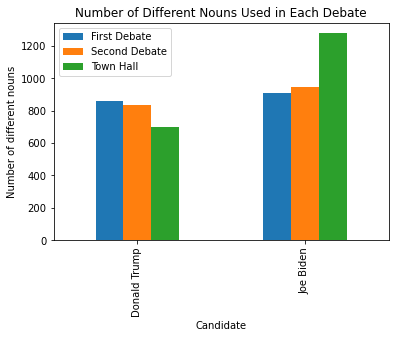

In [198]:
total.plot(kind='bar', title='Number of Different Nouns Used in Each Debate', xlabel='Candidate', ylabel='Number of different nouns')

**Answer.**

In order to count different nouns, I counted the lemmatized form of all nouns. The result is shown above in the dataframe and the bar chart. From the bar chart, it can be seen that:
1. In general, Joe Biden used more nouns in all the three debates than Donald Trump, thus Joe Biden has a wider range of vocabulary.
1. In the first and second debate, Joe Biden used slightly more nouns than Donald Trump while in the town hall meeting, Joe Biden used far more nouns than Donald Trump.

## 4. Report the type-token ratio for each of the candidates (Trump & Biden), based on pooling the data from the two debates, and interpret the differences between the two candidates.

In text analysis, a 'type' is a unique word, whereas a 'token' is any word.  For example, the sentence

"One fish, two fish, red fish, blue fish"

contains 8 tokens, but 5 types (one, two, red, blue, fish).

Interestingly, the type-token ratio can be used to monitor changes in the use of vocabulary items in children with under-developed vocabulary and/or word finding difficulties and, for example, in adults who have suffered a stroke and who consequently exhibit word retrieval difficulties and naming difficulties. [Ref](https://www.sltinfo.com/type-token-ratio/)

In [202]:
# Aggregate unique words and total words by speaker
# Calculate the token-word ratio correctly 
def type_count(doc):
    types = []
    for token in doc:
        if token.lemma_ in types:
            continue;
        else: 
            types.append(token.text)
    return len(types)

In [203]:
## 1. The first debate
first_valid['type_count'] = first_valid['text'].str.lower().apply(nlp).apply(remove_punc).apply(type_count)
first_valid.head()

,speaker,minute,text,first_debate,noun_count_first,type_count
2,Vice President Joe Biden,02:49,"How you doing, man?",4,1,4
3,President Donald J. Trump,02:51,How are you doing?,4,0,4
4,Vice President Joe Biden,02:51,I’m well.,3,0,3
6,President Donald J. Trump,04:01,"Thank you very much, Chris. I will tell you ve...",161,15,90
7,President Donald J. Trump,04:53,And we won the election and therefore we have ...,102,8,58


In [231]:
first_total = first_valid.groupby('speaker').sum()
tt_ratio1 = pd.DataFrame(first_total['type_count'] / first_total['first_debate']).rename(columns={0:'First Debate'}, index={'President Donald J. Trump':'Donald Trump', 'Vice President Joe Biden': 'Joe Biden'})
tt_ratio1

,First Debate
speaker,
Donald Trump,0.736274
Joe Biden,0.709548


In [214]:
## 2. The second debate
second_valid['type_count'] = second_valid['text'].str.lower().apply(nlp).apply(remove_punc).apply(type_count)
second_valid.head()

,speaker,minute,text,second_debate,noun_count_second,type_count
1,Donald Trump,07:37,How are you doing? How are you?,7,0,5
5,Donald Trump,09:04,"So as you know, 2.2 million people modeled out...",106,11,70
6,Donald Trump,09:41,There was a very big spike in Texas. It’s now ...,79,8,48
7,Donald Trump,10:04,"I can tell you from personal experience, I was...",204,22,121
9,Joe Biden,11:13,"220,000 Americans dead. You hear nothing else ...",106,10,76


In [232]:
second_total = second_valid.groupby('speaker').sum()
tt_ratio2 = pd.DataFrame(second_total['type_count'] / second_total['second_debate']).rename(columns={0:'Second Debate'})
tt_ratio2

,Second Debate
speaker,
Donald Trump,0.702159
Joe Biden,0.671215


In [340]:
## 3. Summary
tt_ratio_total = pd.concat([tt_ratio1, tt_ratio2], axis=1)
tt_ratio_total

,First Debate,Second Debate
speaker,,
Donald Trump,0.736274,0.702159
Joe Biden,0.709548,0.671215


**Answer.**

The type-token ratio of the two candidates based on the two debates are recorded in the dataframe shown above.
From the results, it can be observed that Donald Trump has higher type-token ratio in both debates and both the ratio differences are around 0.03. These indicate that Donald Trump's debates have slightly higher lexical diversity than Joe Biden's lexical diversity.

## 5. Compare the use of named entities by the candidates (Trump & Biden) in their town hall meetings.  What patterns, if any, do you see?  

spaCy supports the following Named Entity types:
PERSON, NORP (nationalities, religious and political groups), FAC (buildings, airports etc.), ORG (organizations), GPE (countries, cities etc.), LOC (mountain ranges, water bodies etc.), PRODUCT (products), EVENT (event names), WORK_OF_ART (books, song titles), LAW (legal document titles), LANGUAGE (named languages), DATE, TIME, PERCENT, MONEY, QUANTITY, ORDINAL and CARDINAL.

You might want to use some visualization techniques to support your claims.

In [355]:
# Named entities by candidates
# Pattern/s identification --> visualization
# 1. Count the use of named entities by Biden
biden_valid['doc'] = biden_valid['text'].str.lower().apply(nlp)
biden_valid.head()

,speaker,minute,text,biden_townhall,noun_count_biden_townhall,noun_count_townhall,type_count,doc
1,Joe Biden,00:46,Good to be with you.,5,0,0,5,"(good, to, be, with, you, .)"
3,Joe Biden,01:02,Okay.,1,0,0,1,"(okay, .)"
5,Joe Biden,01:08,I know it well.,4,0,0,4,"(i, know, it, well, .)"
8,Joe Biden,01:55,"Well, first of all, going back, the fact is th...",61,10,9,46,"(well, ,, first, of, all, ,, going, back, ,, t..."
9,Joe Biden,02:16,"I suggested that we should be seeking, and I d...",87,13,12,65,"(i, suggested, that, we, should, be, seeking, ..."


In [356]:
biden_ent = []
for doc in biden_valid['doc']:
    for ent in doc.ents:
        biden_ent.append(ent.label_)

In [357]:
Counter(biden_ent)

Counter({'ORDINAL': 22,
         'GPE': 35,
         'ORG': 24,
         'CARDINAL': 92,
         'DATE': 38,
         'PERSON': 13,
         'NORP': 30,
         'PERCENT': 17,
         'MONEY': 24,
         'TIME': 1,
         'WORK_OF_ART': 1,
         'LOC': 2,
         'QUANTITY': 2})

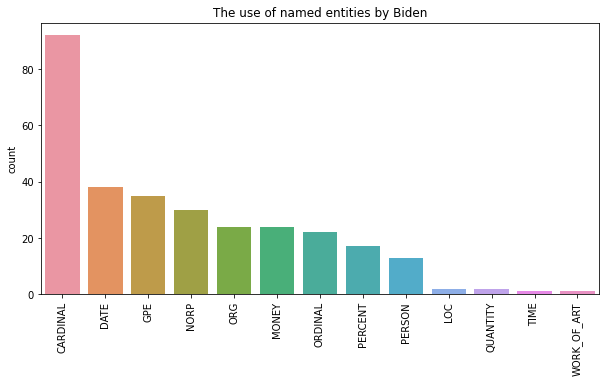

In [359]:
# Count plot
plt.figure(figsize=(10,5))
sns.countplot(x=biden_ent, order=pd.Series(biden_ent).value_counts().index)
plt.title('The use of named entities by Biden')
plt.xticks(rotation=90)
plt.show()

In [344]:
## 2. Count the use of named entities by Trump
trump_valid['doc'] = trump_valid['text'].str.lower().apply(nlp)
trump_valid.head()

,speaker,minute,text,trump_townhall,noun_count_trump_townhall,noun_count_townhall,type_count,doc
3,President Trump,04:48,"I’m feeling great, I don’t know about you. How...",14,0,0,14,"(i, ’m, feeling, great, ,, i, do, n’t, know, a..."
5,President Trump,05:00,"It’s great to be back in my home state, Florid...",20,4,4,17,"(it, ’s, great, to, be, back, in, my, home, st..."
7,President Trump,05:10,My goal is to fight for you and fight for your...,12,2,2,10,"(my, goal, is, to, fight, for, you, and, fight..."
11,President Trump,06:37,"That was very well stated, I have to say. Good...",11,1,1,11,"(that, was, very, well, stated, ,, i, have, to..."
13,President Trump,06:46,"Thank you, thank you.",4,0,0,2,"(thank, you, ,, thank, you, .)"


In [286]:
trump_ent = []
for doc in trump_valid['doc']:
    for ent in doc.ents:
        trump_ent.append(ent.label_)

In [287]:
Counter(trump_ent)

Counter({'GPE': 51,
         'DATE': 36,
         'NORP': 14,
         'TIME': 3,
         'ORDINAL': 4,
         'CARDINAL': 36,
         'ORG': 12,
         'PERCENT': 13,
         'LOC': 4,
         'PERSON': 15,
         'MONEY': 6,
         'LAW': 3,
         'QUANTITY': 1})

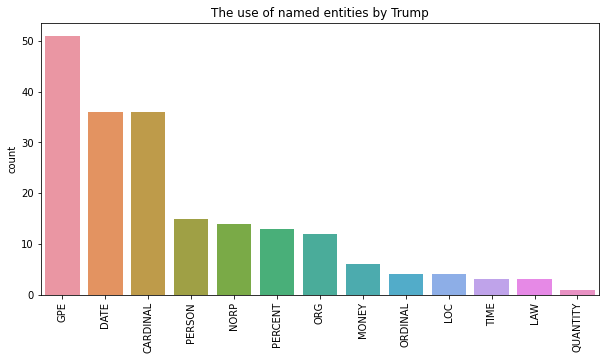

In [298]:
# Count plot
plt.figure(figsize=(10,5))
sns.countplot(x=trump_ent, order=pd.Series(trump_ent).value_counts().index)
plt.title('The use of named entities by Trump')
plt.xticks(rotation=90)
plt.show()

**Answer.**

The use of named entities by Biden and Trump in their town hall meetings are plotted using the count plot. 
1. The first three mostly used entities are the same for Biden and Trump (Cardinal, Date and GPE). 
1. However, Biden used much more Cardinal entities than others while Trump used GPE the most and Date and Cardinal entities for around 35 times.
1. Trump used LAW entity (named documents made into laws) while Biden didn't.

## 6. Generate a word cloud for Trump's town hall (use only Trump's words) and one for Biden's town hall (again, use only Biden's words).  Compare and contrast the two word clouds.

Install a word cloud generating package like the one from https://github.com/amueller/word_cloud

In [361]:
from wordcloud import WordCloud

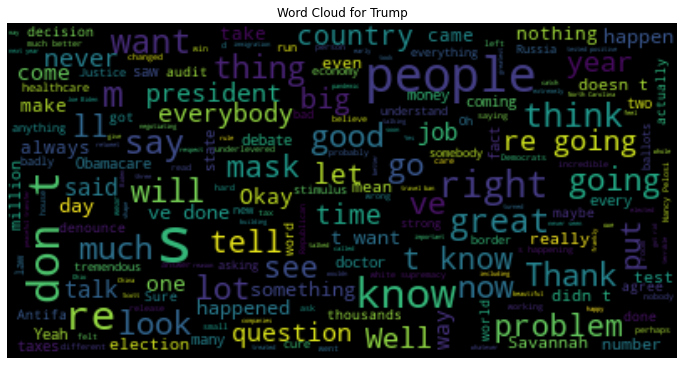

In [370]:
# Word cloud for both candidates’ town hall 
## 1. Word cloud for Trump's town hall
# Convert the text into a txt file
trump_text = ''
for text in trump_valid['text']:
    trump_text += text

# Display the generated image:
wordcloud_t = WordCloud(max_font_size=40).generate(trump_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_t, interpolation="bilinear")
plt.title('Word Cloud for Trump')
plt.axis("off")
plt.show()
# don't; will; people; know; going; problem; question
# job, mask, 

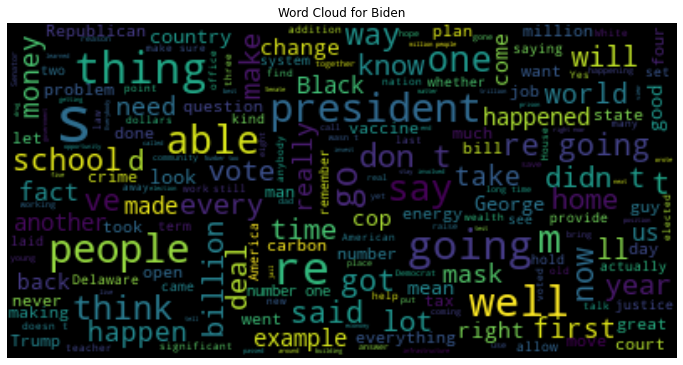

In [369]:
## 2. Word cloud for Biden's town hall
# Convert the text into a txt file
biden_text = ''
for text in biden_valid['text']:
    biden_text += text

# Display the generated image:
wordcloud_b = WordCloud(max_font_size=40).generate(biden_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_b, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for Biden')
plt.show()
# thing, president, able, school, people, well
# black, school, world, mask

**Answer.**

From the two word clouds shown above, there are several observations:
1. Both Trump and Biden used many words like "people", "will", "going" to express their actions to improve the country if they become president.
1. Both Trump and Biden cared about COVID-19 situation, using "mask" and "vaccination" in their speaks.
1. In Trump's speak, the frequencies of "job", "question" and "problem" are higher.
1. Different from Trump, Biden used words "black", "school", "world" much more often than Trump.

## 7. Sentiment analysis of Trump vs. Biden in second debate

Note that you will want to review the video on Sentiment Analysis with NLTK and spaCy from the pre-recorded lectures.

Perform a sentiment analysis that compares the sentiment of the two candidates (Trump & Biden) in the second debate.  

There are several ways to do this.  In its simplest form, you could determine the sentiment for each utterance, the perform some mathematical summary (sum, mean, etc.) A slightly more elegant solution would involve tracking how sentiment changes over the course of the debate for each of the candidates.  A further extension of your work might use the [pandas.DataFrame.rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) method to calculate rolling averages, although using that function will probably require you to also learn about [time functions in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

No matter what approach you choose, you should be sure to use visualizations in your answer.  As always, provide an interpretation of your results, including any visualizations (i.e. don't just provide a visualization, explain what's interesting that you see in your visualizations).

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from spacy.tokens import Doc

sent_analyzer = SentimentIntensityAnalyzer()
def sentiment_scores(docx):
    return sent_analyzer.polarity_scores(docx.text)
Doc.set_extension("sentimenter",getter=sentiment_scores)

In [10]:
# sentiment analysis that compares the sentiment of the two candidates (Trump & Biden) in the second debate
# visualizations of the sentiment analysis 
second_valid['rating'] = second_valid['text'].apply(lambda x: nlp(x)._.sentimenter['compound'])
second_valid

,speaker,minute,text,rating
1,Donald Trump,07:37,How are you doing? How are you?,0.0000
5,Donald Trump,09:04,"So as you know, 2.2 million people modeled out...",-0.9190
6,Donald Trump,09:41,There was a very big spike in Texas. It’s now ...,0.3612
7,Donald Trump,10:04,"I can tell you from personal experience, I was...",0.5574
9,Joe Biden,11:13,"220,000 Americans dead. You hear nothing else ...",0.1518
...,...,...,...,...
505,Donald Trump,25:01,"Before the plague came in, just before, I was ...",0.6808
506,Donald Trump,25:28,Success is going to bring us together. We are ...,-0.9655
508,Joe Biden,25:57,"I will say, I’m an American President. I repre...",0.9001
509,Joe Biden,26:19,"We can grow this economy, we can deal with the...",0.9628


In [322]:
second_valid.groupby('speaker').rating.mean()

speaker
Donald Trump    0.032838
Joe Biden       0.010272
Name: rating, dtype: float64

Text(0.5, 1.0, 'Box Plot for Sentiment Analysis')

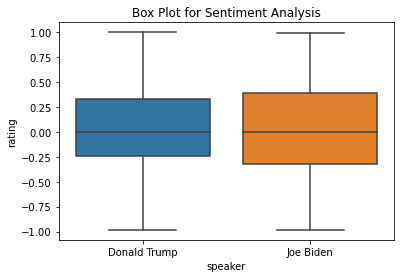

In [14]:
sns.boxplot(x='speaker',y='rating',data=second_valid)
plt.title('Box Plot for Sentiment Analysis')

**Answer.**

To conduct the sentiment analysis for Trump and Biden, a box plot is plotted above.
1. The mean of the rating of Donald Trump is slightly larger than that of Joe Biden, meaning that Trump showed slightly more positive attitudes in his speak, but the difference is relatively small.
1. There exits a large overlap between the ratings, so the sentiment of Trump and Biden is similar in their speaks.
1. Joe Biden showed slightly more sentiment variations in his speak than Donald Trump.

# Please submit your notebook in .IPYNB and .HTML formats

We **strongly** suggest running all cells from top to bottom before you submit your notebook.